In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c signal-types

 38% 5.00M/13.2M [00:00<00:00, 41.7MB/s]
100% 13.2M/13.2M [00:00<00:00, 87.7MB/s]


In [ ]:
! unzip signal-types.zip -d signal-type

Archive:  signal-types.zip
  inflating: signal-type/.pdf        
  inflating: signal-type/Run200_Wave_0_1.txt  
  inflating: signal-type/test-dataset.ipynb  


In [ ]:
# Data loading

dataset = pd.read_csv('/content/signal-type/Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)
dataset = dataset.drop([0, 1, 2, 3, 504], axis=1)
dataset.columns = list(range(500))
dataset.describe()


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,...,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000
mean,14822.972316,14822.958474,14822.970016,14822.989991,14823.003961,14822.978619,14822.968610,14822.954470,14822.963670,14822.968908,...,14822.329017,14822.315686,14822.272073,14822.171728,14822.257123,14822.317092,14822.279399,14822.278163,14822.287789,14822.283743
std,2.805884,2.833516,2.840755,2.852066,2.833412,2.836271,2.831241,2.827526,2.846291,2.814655,...,3.357997,3.373568,3.340707,3.332547,3.290301,3.232245,3.268458,3.251192,3.253340,3.242307
min,14812.000000,14812.000000,14812.000000,14811.000000,14812.000000,14812.000000,14812.000000,14811.000000,14812.000000,14809.000000,...,14800.000000,14798.000000,14802.000000,14796.000000,14802.000000,14801.000000,14798.000000,14804.000000,14800.000000,14802.000000
25%,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,14821.000000,...,14820.000000,14820.000000,14820.000000,14820.000000,14820.000000,14820.000000,14820.000000,14820.000000,14820.000000,14820.000000
50%,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,...,14823.000000,14823.000000,14823.000000,14822.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000
75%,14824.000000,14824.000000,14825.000000,14825.000000,14825.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,...,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000,14824.000000
max,14834.000000,14835.000000,14834.000000,14835.000000,14834.000000,14835.000000,14835.000000,14833.000000,14834.000000,14834.000000,...,14836.000000,14835.000000,14834.000000,14836.000000,14833.000000,14834.000000,14833.000000,14834.000000,14833.000000,14835.000000


In [ ]:
dataset.shape

(23479, 500)

Text(0, 0.5, 'bit ADC')

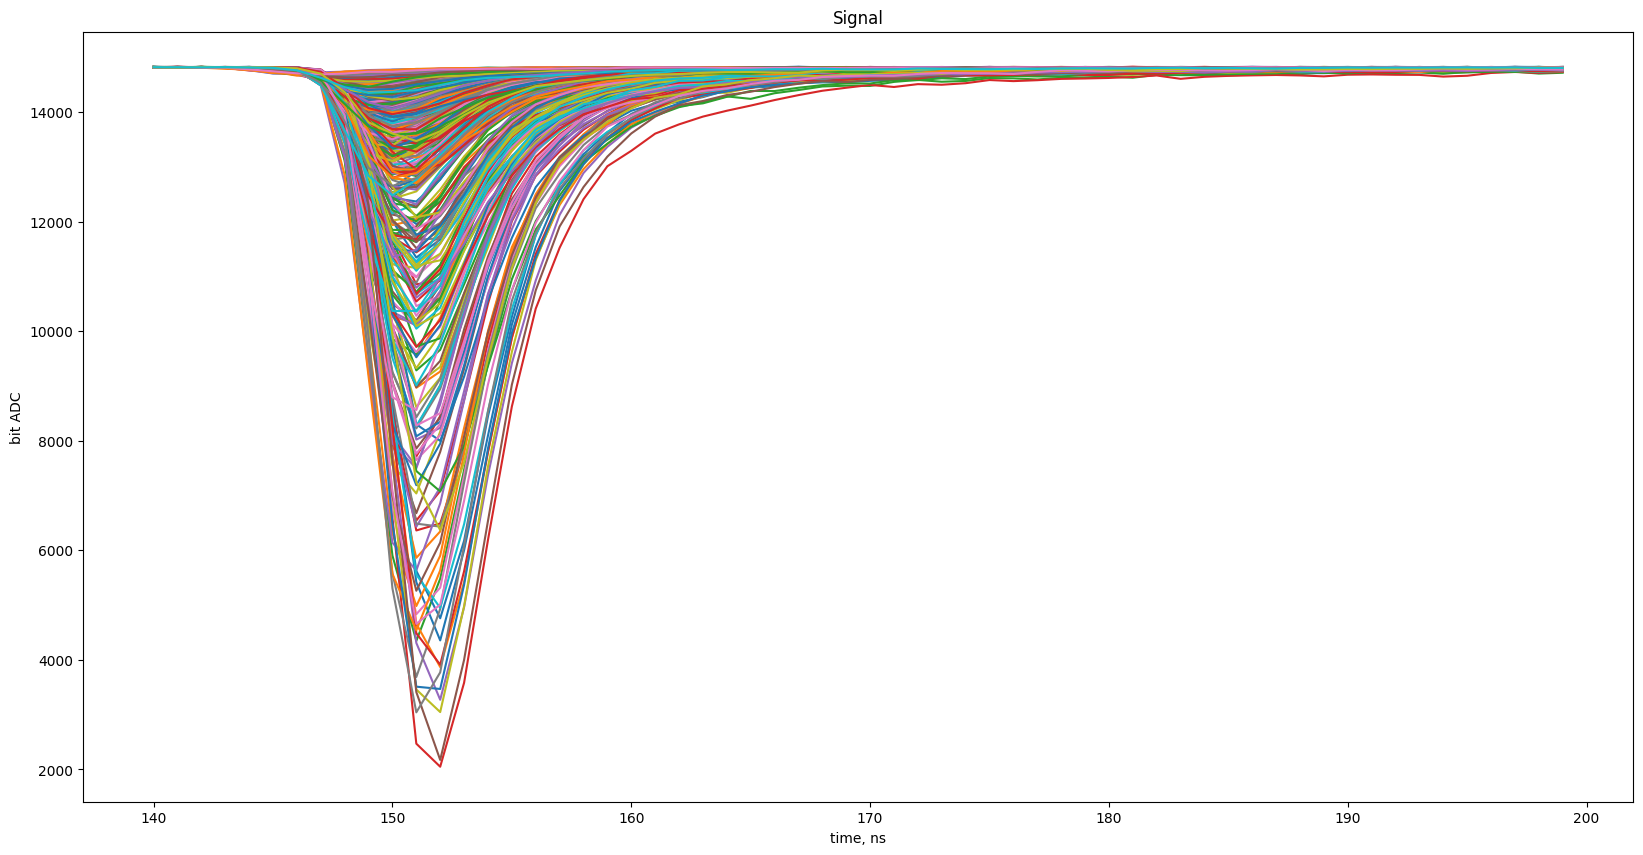

In [ ]:
N=range(0,500)
ax = dataset.T[N][140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

Text(0, 0.5, 'bit ADC')

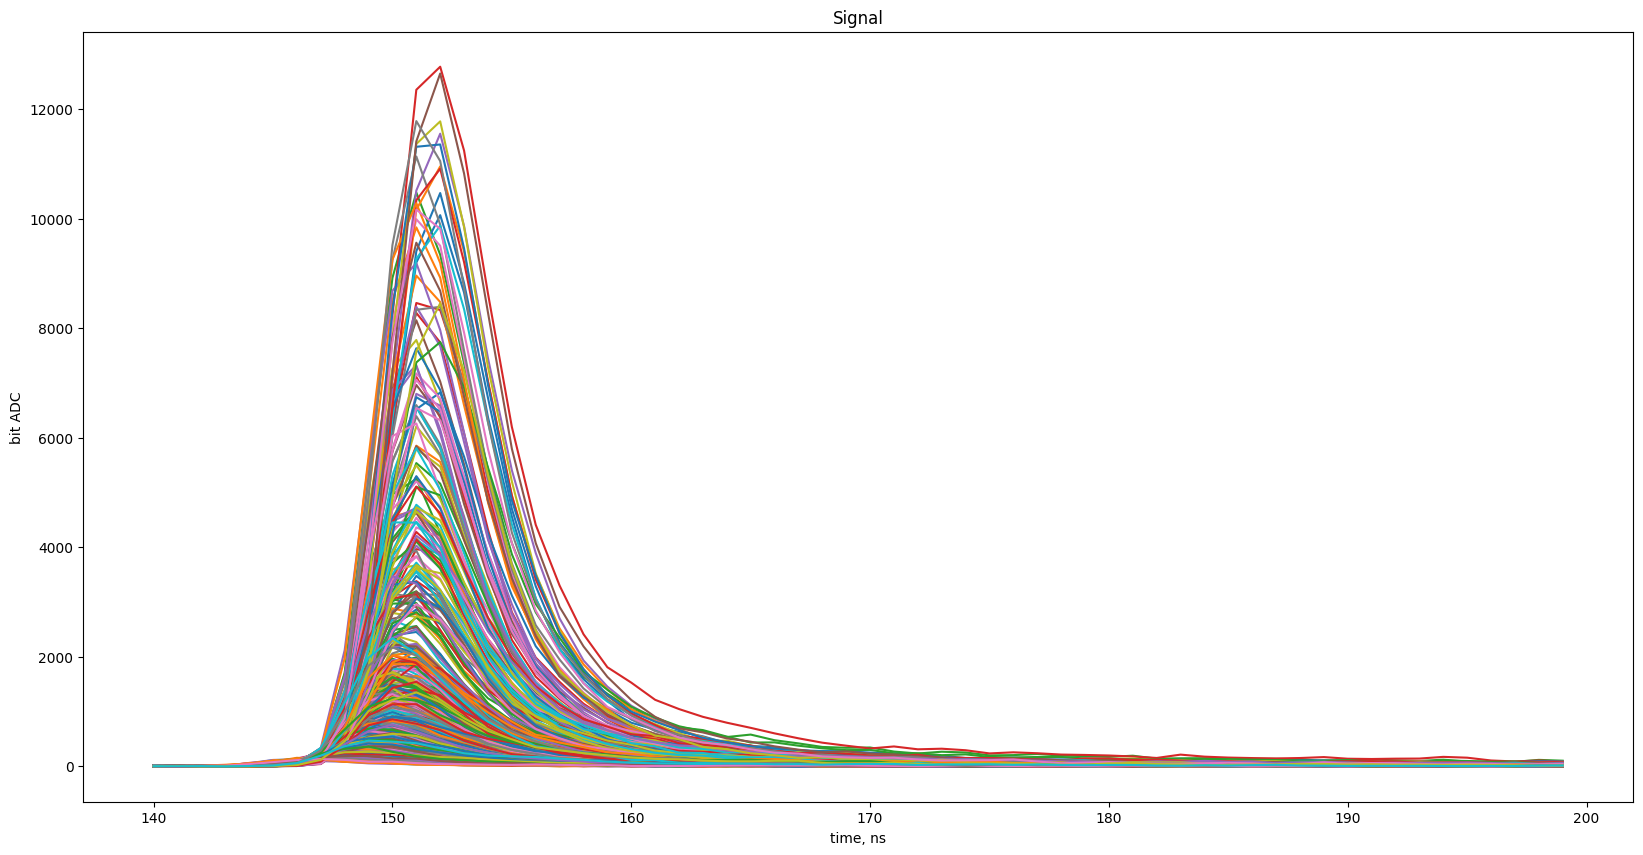

In [ ]:
ax = (2**14-dataset.T[N]-1560)[140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")


In [ ]:
X = dataset.loc[:, dataset.columns[140:200]]

In [ ]:
#Находим площадь под графиками каждого сигнала методом трапеций и создаем новый датасет df со столбцом volume
from scipy.integrate import trapz
x = np.linspace(0, 1, 60)
y = np.array(-X.loc[:,:] + 2**14 - 1560).T
area = trapz(y, x, axis=0)
df = pd.DataFrame((area))
df.index.name = 'index'
df.columns = ['volume']
df

<ipython-input-9-4cd84c22d08f>:5: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  area = trapz(y, x, axis=0)


,volume
index,
0,70.500000
1,200.254237
2,278.211864
3,71.406780
4,194.118644
...,...
23474,55.889831
23475,701.127119
23476,598.796610


In [ ]:
np.array(-X.loc[:,:] + 2**14 - 1560).max(axis = 1)
df['amplitude'] = pd.DataFrame((np.array(-X.loc[:,:] + 2**14 - 1560).max(axis = 1)))

In [ ]:
df

,volume,amplitude
index,,
0,70.500000,533
1,200.254237,1903
2,278.211864,2560
3,71.406780,566
4,194.118644,1796
...,...,...
23474,55.889831,504
23475,701.127119,5767
23476,598.796610,4999


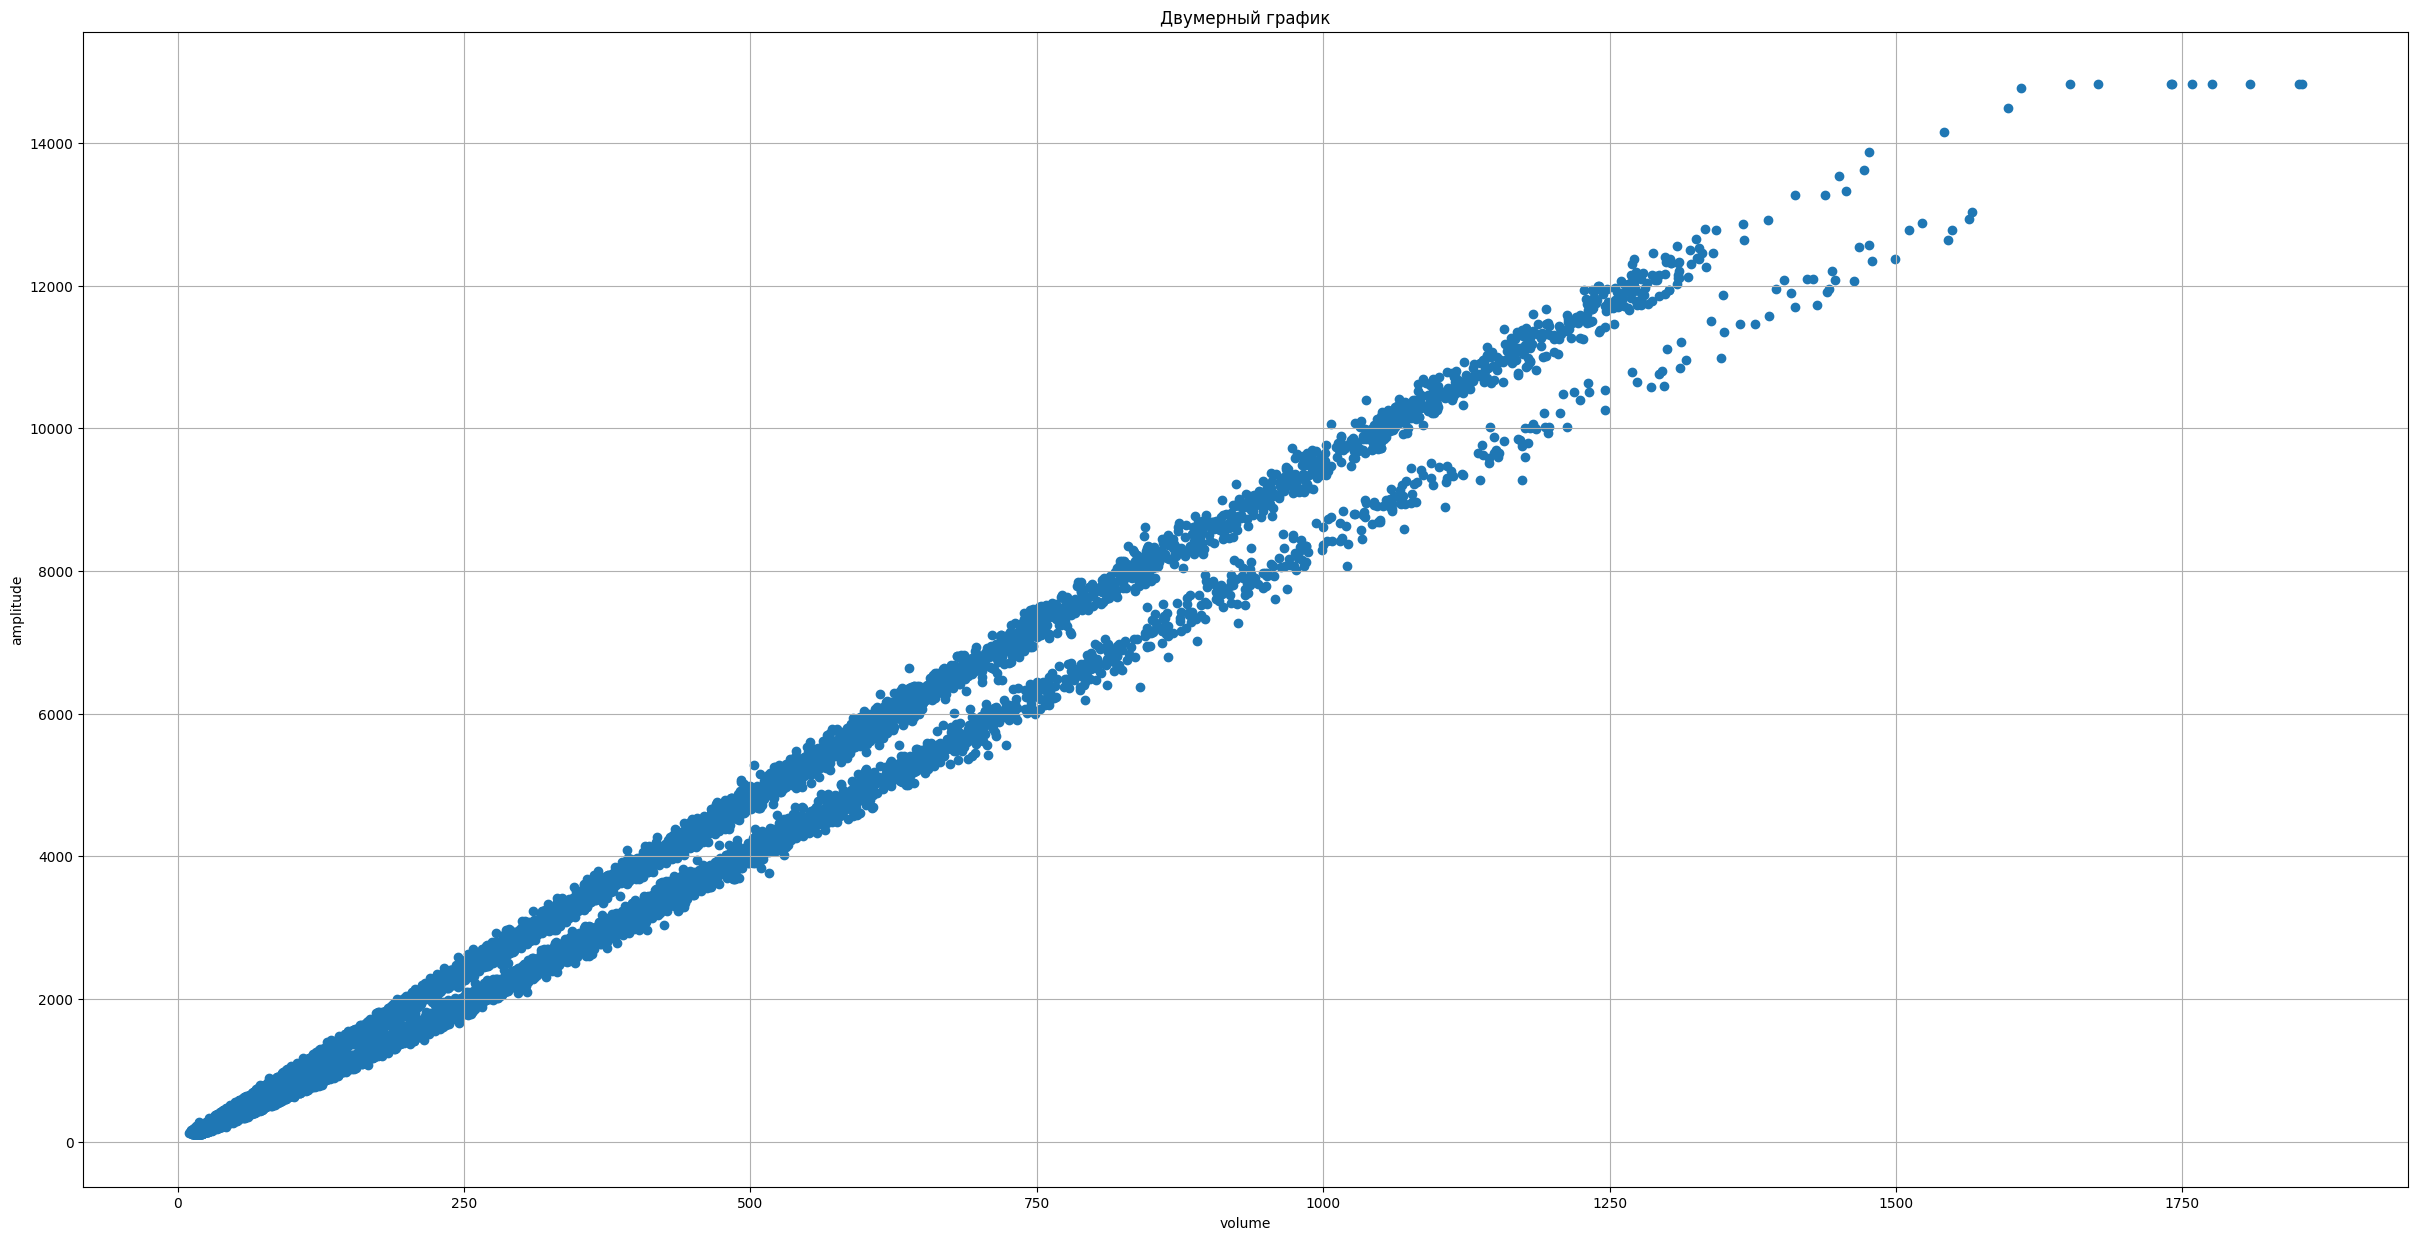

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Построение графика:
plt.figure(figsize=(30, 15))
plt.scatter(df['volume'], df['amplitude'])
plt.xlabel("volume")
plt.ylabel("amplitude")
plt.title("Двумерный график")
plt.grid(True)
plt.show()

Теперь разберемся с коэффицентом psd


In [ ]:
x1 = np.linspace(0, 1, 18)
y1 = np.array(-dataset.loc[:,140:157] + 2**14 - 1560) # short area
area1 = np.trapz(y1, x1)
area1.shape

(23479,)

In [ ]:
x2 = np.linspace(0,1,61)
y2 = np.array(-dataset.loc[:,140:200] + 2**14 - 1560)
area2 = np.trapz(y2, x2) # long area
area2.shape

(23479,)

In [ ]:
df['psd'] = pd.DataFrame((area2  - area1 )/(area2))
df.describe()

,volume,amplitude,psd
count,23479.000000,23479.000000,23479.000000
mean,209.442146,1836.123259,-1.859612
std,259.536919,2389.316432,0.221656
min,9.855932,105.000000,-2.711497
25%,38.860169,309.000000,-2.064957
50%,98.000000,814.000000,-1.830471
75%,271.457627,2316.000000,-1.653522
max,1854.847458,14824.000000,-1.304546


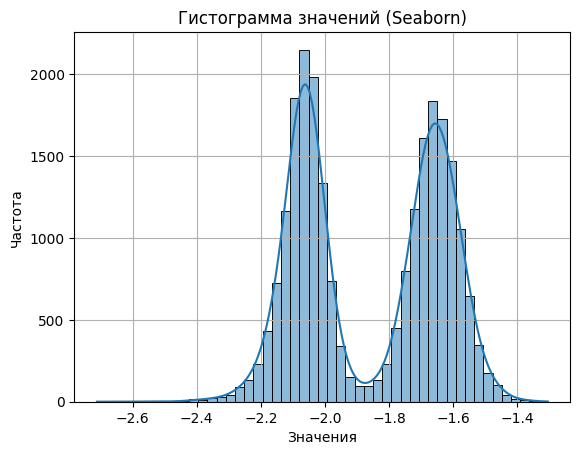

In [ ]:
sns.histplot(df['psd'], kde=True) # kde=True добавляет кривую плотности

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма значений (Seaborn)')
plt.grid(True)
plt.show()

In [ ]:
df['alpha'] = df.apply(lambda row: row['amplitude'] / row['volume'], axis=1)
df.describe()

,volume,amplitude,psd,alpha
count,23479.000000,23479.000000,23479.000000,23479.000000
mean,209.442146,1836.123259,-1.859612,8.365071
std,259.536919,2389.316432,0.221656,1.203886
min,9.855932,105.000000,-2.711497,4.933387
25%,38.860169,309.000000,-2.064957,7.342065
50%,98.000000,814.000000,-1.830471,8.322525
75%,271.457627,2316.000000,-1.653522,9.475905
max,1854.847458,14824.000000,-1.304546,15.255368


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples #23479
df['cluster'] = np.zeros(23479).T
# Нормализация данных
scaler = StandardScaler()
X_scaled = df.drop(['cluster','volume','amplitude',], axis = 1) #scaler.fit_transform(df)

# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters=2, random_state=7,algorithm = 'lloyd', n_init = 5)
labels_kmeans = kmeans.fit_predict(X_scaled)


silhouette_avg_kmeans = silhouette_score(X_scaled, labels_kmeans)
samples = silhouette_samples(X_scaled, labels_kmeans)

print(f"KMeans: Silhouette score = {silhouette_avg_kmeans}")


KMeans: Silhouette score = 0.6839221463478655


In [ ]:
df_ans = pd.DataFrame((labels_kmeans))
df_ans.index.name = 'index'
df_ans.columns = ['cluster']

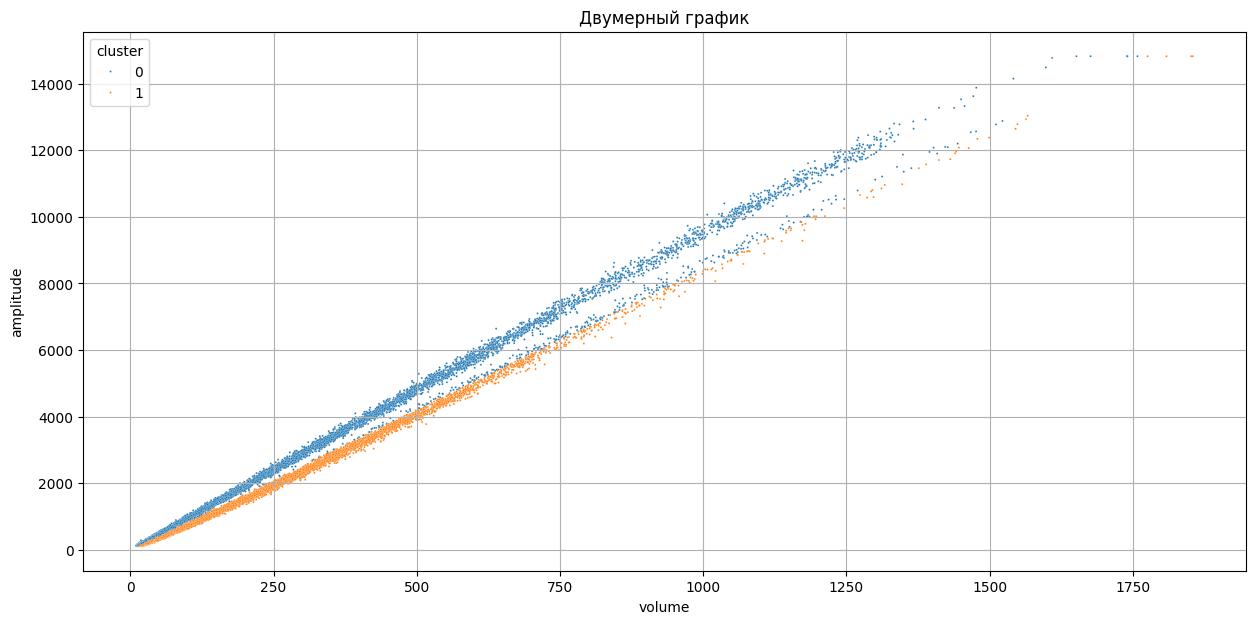

In [ ]:
# Построение графика:
df['cluster'] = pd.DataFrame((labels_kmeans))
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='volume', y='amplitude', hue='cluster', s = 2 )
plt.xlabel("volume")
plt.ylabel("amplitude")
plt.title("Двумерный график")
plt.grid(True)
plt.show()

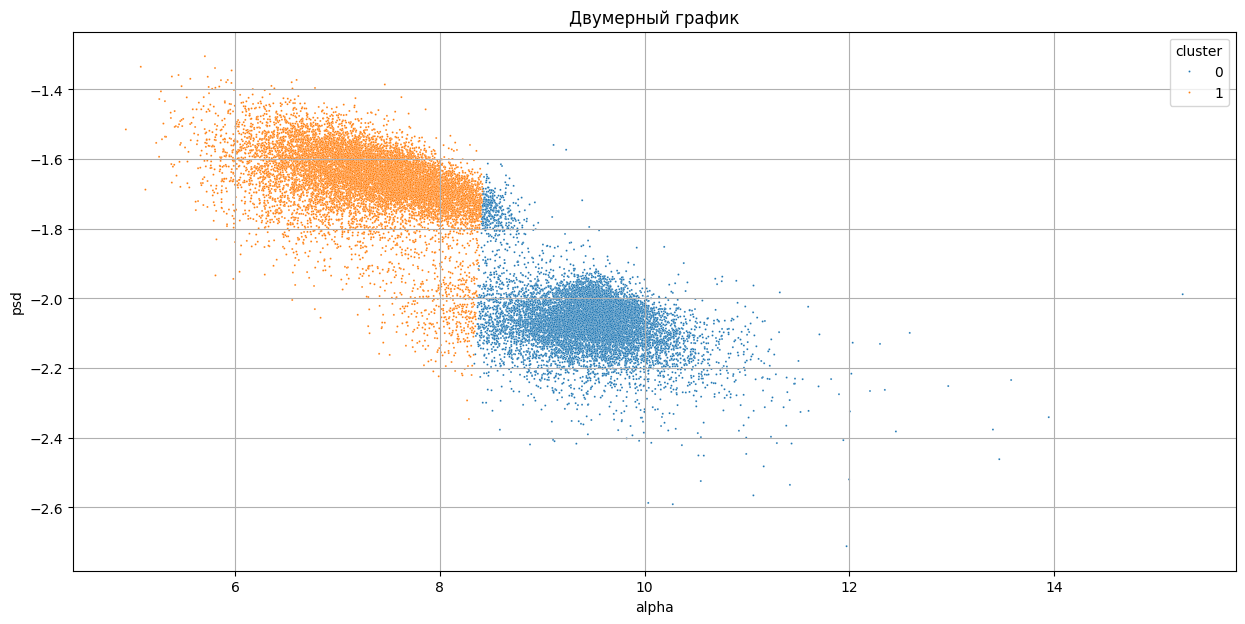

In [ ]:
# Построение графика:
df['cluster'] = pd.DataFrame((labels_kmeans))
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='alpha', y='psd', hue='cluster', s = 2 )
plt.xlabel("alpha")
plt.ylabel("psd")
plt.title("Двумерный график")
plt.grid(True)
plt.show()

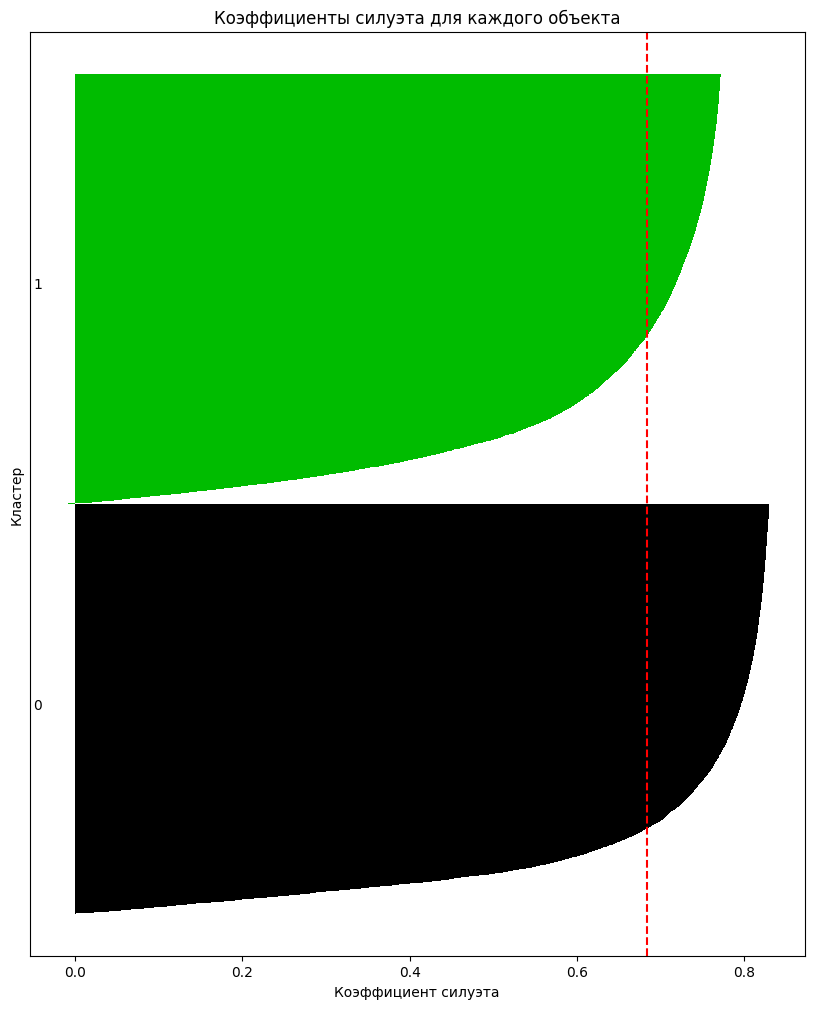

In [ ]:
# Вычисление коэффициентов силуэта
silhouette_avg = silhouette_avg_kmeans
sample_silhouette_values = samples

# Сортировка данных по кластерам и коэффициентам силуэта
n_clusters = len(np.unique(labels_kmeans))
y_lower = 10

fig, ax = plt.subplots(1,1,figsize=(10,12))

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels_kmeans == i]
    ith_cluster_silhouette_values = np.sort(ith_cluster_silhouette_values) # Сортируем по возрастанию
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)

    for j in range(size_cluster_i):
        ax.barh(y_lower + j, ith_cluster_silhouette_values[j], height=1, color=color)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10


ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Коэффициент силуэта")
ax.set_ylabel("Кластер")
ax.set_title("Коэффициенты силуэта для каждого объекта")
ax.set_yticks([])

plt.show()

видим, что кластеры разделяются примерно по -1.9 psd

In [ ]:
df.loc[df['psd'] > -2.9, 'cluster'] = 2
df.loc[df['psd'] > -1.86, 'cluster'] = 0
df.loc[df['psd'] < -1.9, 'cluster'] = 1

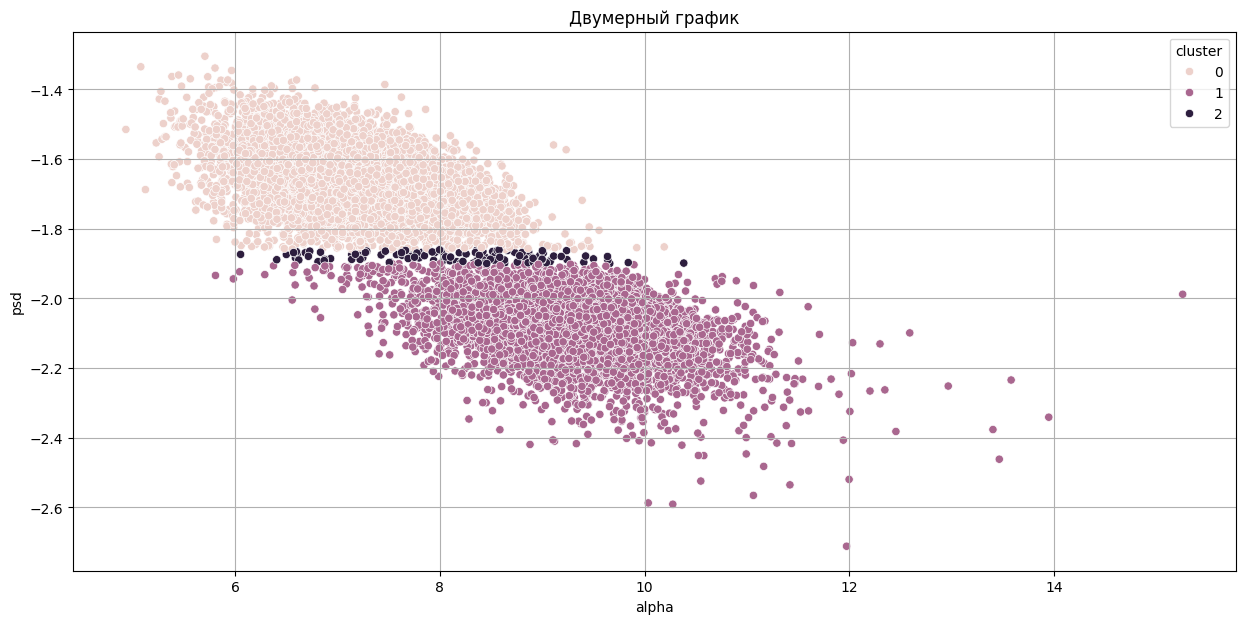

In [ ]:
# Построение графика:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='alpha', y='psd', hue='cluster')
plt.xlabel("alpha")
plt.ylabel("psd")
plt.title("Двумерный график")
plt.grid(True)
plt.show()

In [ ]:
#проверим разделение на два кластерa
df_ans1 = df['cluster']
df_ans1.to_csv("answer6.csv", index=True)
df_ans1.value_counts()

,count
cluster,
0,11869
1,11487
2,123
